In [92]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

Импортируем и подготовим данные.

In [93]:
df = pd.read_csv('deposits1.csv', delimiter=',')
df

,DATA,DBC,1d,2d,3d,4d,5d,6d,7d,110d,11d,12d,13d,14d,15d,16d,17d,18d,19d,20d
0,yan.2014,1.98,2.18,4.85,5.01,5.80,7.17,5.30,6.03,7.32,7.43,7.33,5.54,6.32,7.03,7.56,5.61,7.98,9.40,8.01
1,02.2014,1.77,2.30,4.85,4.98,5.75,7.04,5.09,5.94,7.30,7.28,7.30,5.47,6.43,7.41,8.02,5.56,7.84,8.58,7.91
2,03.2014,1.57,1.79,4.74,5.01,5.64,7.02,5.07,5.91,7.17,7.08,7.17,6.80,7.75,8.25,8.84,6.90,7.65,9.71,7.72
3,04.2014,1.28,1.84,4.54,5.07,5.68,7.20,5.18,6.04,7.61,6.97,7.56,7.06,8.14,8.66,8.57,7.14,8.53,10.06,8.65
4,05.2014,1.10,1.41,5.48,5.10,5.79,7.19,5.19,6.06,7.85,6.95,7.78,7.41,8.73,9.27,9.62,7.54,8.69,6.92,8.66
5,06.2014,1.20,1.79,4.72,5.16,5.91,7.40,5.33,6.21,7.80,6.68,7.72,7.39,8.66,9.01,9.64,7.51,9.00,4.42,8.66
6,07.2014,1.58,1.89,5.49,5.15,5.91,7.36,5.54,6.17,7.89,6.44,7.80,7.40,8.62,9.10,9.43,7.49,8.72,9.95,8.77
7,08.2014,1.69,2.07,6.34,5.23,5.88,7.37,5.63,6.19,7.95,6.95,7.89,7.20,8.95,9.66,9.69,7.35,9.37,8.02,9.31
8,09.2014,1.85,2.52,5.58,5.16,5.93,7.56,5.71,6.27,8.09,7.03,8.02,7.24,9.21,9.62,9.73,7.37,9.43,9.61,9.44
9,10.2014,1.94,2.24,6.41,5.26,6.06,7.82,5.95,6.50,8.20,7.42,8.15,7.47,9.53,9.76,10.45,7.62,8.48,9.60,8.54


In [71]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATA    25 non-null     object 
 1   DBC     25 non-null     float64
 2   1d      25 non-null     float64
 3   2d      25 non-null     float64
 4   3d      25 non-null     float64
 5   4d      25 non-null     float64
 6   5d      25 non-null     float64
 7   6d      25 non-null     float64
 8   7d      25 non-null     float64
 9   110d    25 non-null     float64
 10  11d     25 non-null     float64
 11  12d     25 non-null     float64
 12  13d     25 non-null     float64
 13  14d     25 non-null     float64
 14  15d     25 non-null     float64
 15  16d     25 non-null     float64
 16  17d     25 non-null     float64
 17  18d     25 non-null     float64
 18  19d     25 non-null     float64
 19  20d     25 non-null     float64
dtypes: float64(19), object(1)
memory usage: 4.0+ KB


,DBC,1d,2d,3d,4d,5d,6d,7d,110d,11d,12d,13d,14d,15d,16d,17d,18d,19d,20d
count,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.00000,25.000000,25.000000,25.0000
mean,2.38400,3.089600,8.197600,7.293200,7.982400,9.114400,7.642800,8.210400,9.196000,7.602800,9.129200,9.496800,10.712400,11.22640,11.051600,9.59880,10.384800,10.316800,10.3768
std,1.11602,1.168833,2.896015,2.404391,2.698678,1.843362,2.346413,2.253287,1.611653,1.130489,1.583048,2.612521,2.975049,2.99874,2.201452,2.63676,1.861263,2.366541,1.8660
min,1.10000,1.410000,4.540000,4.980000,5.160000,7.020000,5.070000,5.910000,7.170000,6.140000,7.170000,5.470000,6.320000,7.03000,7.560000,5.56000,7.650000,4.420000,7.7200
25%,1.71000,2.180000,5.490000,5.160000,5.880000,7.370000,5.540000,6.190000,7.890000,6.730000,7.800000,7.390000,8.730000,9.27000,9.640000,7.49000,8.720000,9.610000,8.6600
50%,2.01000,3.060000,8.610000,7.280000,6.530000,9.100000,7.450000,7.790000,8.950000,7.280000,8.880000,9.730000,10.440000,10.87000,10.640000,9.79000,10.180000,10.060000,10.1400
75%,2.81000,3.500000,10.040000,8.630000,9.050000,10.270000,8.860000,9.360000,10.250000,8.520000,10.220000,10.950000,11.350000,11.73000,11.950000,10.98000,11.750000,11.140000,11.6700
max,5.68000,5.920000,13.680000,12.880000,13.810000,12.730000,12.330000,12.850000,13.230000,9.970000,13.110000,14.660000,18.840000,19.95000,16.040000,14.83000,13.780000,17.120000,13.7400


In [70]:
df['DBC'].mean()
print(f"{df['DBC'].mean():.3f}")

2.384


In [73]:
df.groupby('15d').agg(['mean', 'sum']).head(10)

DBC          1d          2d          3d          4d        ...    16d  \
      mean   sum  mean   sum  mean   sum  mean   sum  mean   sum  ...   mean   
15d                                                               ...          
7.03  1.98  1.98  2.18  2.18  4.85  4.85  5.01  5.01  5.80  5.80  ...   7.56   
7.41  1.77  1.77  2.30  2.30  4.85  4.85  4.98  4.98  5.75  5.75  ...   8.02   
8.25  1.57  1.57  1.79  1.79  4.74  4.74  5.01  5.01  5.64  5.64  ...   8.84   
8.66  1.28  1.28  1.84  1.84  4.54  4.54  5.07  5.07  5.68  5.68  ...   8.57   
9.01  1.20  1.20  1.79  1.79  4.72  4.72  5.16  5.16  5.91  5.91  ...   9.64   
9.10  1.58  1.58  1.89  1.89  5.49  5.49  5.15  5.15  5.91  5.91  ...   9.43   
9.27  1.10  1.10  1.41  1.41  5.48  5.48  5.10  5.10  5.79  5.79  ...   9.62   
9.62  1.85  1.85  2.52  2.52  5.58  5.58  5.16  5.16  5.93  5.93  ...   9.73   
9.66  1.69  1.69  2.07  2.07  6.34  6.34  5.23  5.23  5.88  5.88  ...   9.69   
9.76  1.94  1.94  2.24  2.24  6.41  6.41  5.26  5.26  6.06  6.06  ...  10.45   

              17d         18d          19d          20d        
        sum  mean   sum  mean   sum   mean    sum  mean   sum  
15d                                                            
7.03   7.56  5.61  5.61  7.98  7.98   9.40   9.40  8.01  8.01  
7.41   8.02  5.56  5.56  7.84  7.84   8.58   8.58  7.91  7.91  
8.25   8.84  6.90  6.90  7.65  7.65   9.71   9.71  7.72  7.72  
8.66   8.57  7.14  7.14  8.53  8.53  10.06  10.06  8.65  8.65  
9.01   9.64  7.51  7.51  9.00  9.00   4.42   4.42  8.66  8.66  
9.10   9.43  7.49  7.49  8.72  8.72   9.95   9.95  8.77  8.77  
9.27   9.62  7.54  7.54  8.69  8.69   6.92   6.92  8.66  8.66  
9.62   9.73  7.37  7.37  9.43  9.43   9.61   9.61  9.44  9.44  
9.66   9.69  7.35  7.35  9.37  9.37   8.02   8.02  9.31  9.31  
9.76  10.45  7.62  7.62  8.48  8.48   9.60   9.60  8.54  8.54  

[10 rows x 36 columns]

In [83]:
def my_diff(x):
    return max(x) - min(x)
df.groupby('1d').agg(my_diff).head()

,DBC,2d,3d,4d,5d,6d,7d,110d,11d,12d,13d,14d,15d,16d,17d,18d,19d,20d
1d,,,,,,,,,,,,,,,,,,
1.41,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1.79,0.37,0.02,0.15,0.27,0.38,0.26,0.3,0.63,0.4,0.55,0.59,0.91,0.76,0.8,0.61,1.35,5.29,0.94
1.84,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1.89,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00


In [87]:
X = df['DBC']
Y = df['15d']
covXY = np.cov(X,Y)
covXY


array([[1.2455    , 2.979565  ],
       [2.979565  , 8.99244067]])

In [89]:
X.var(), Y.var()

(1.2455, 8.992440666666665)

In [91]:
np.corrcoef(X, Y)

array([[1.        , 0.89031196],
       [0.89031196, 1.        ]])

In [51]:
f_std = np.sqrt(((df['15d'] - df['15d'].mean()) ** 2).sum() / df['15d'].count())
print(f"{f_std:.3f}")

2.938


Эту же величину можно вычислить сразу с помощью метода `.std`.

In [94]:
df['1d'].std(ddof=0)
print(f"{df['15d'].std(ddof=0):.3f}")

2.938


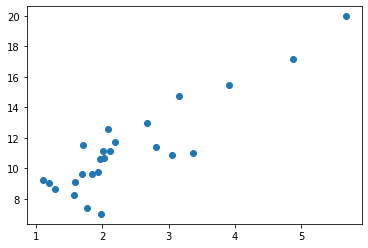

In [99]:
Z = df['5d']
plt.scatter(X,Y)
plt.show()

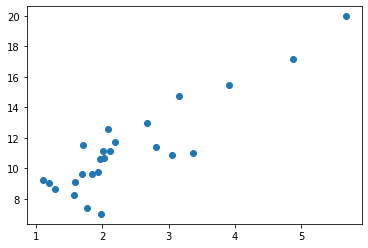

In [101]:
Z = df['15d']
plt.scatter(X,Z)
plt.show()

[Text(0, 0.5, '1d'), (0, 50), Text(0.5, 0, '15d'), Text(0.5, 1.0, 'Stavki')]

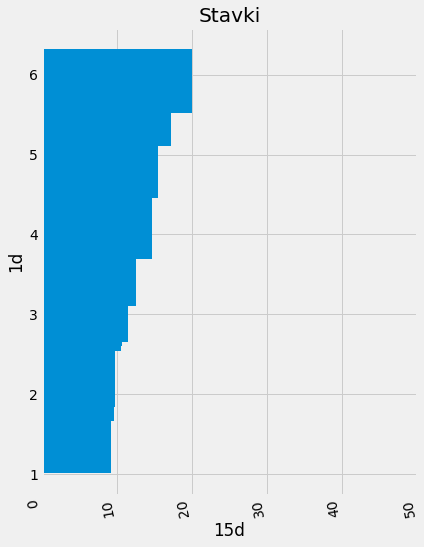

In [118]:
from matplotlib.ticker import FuncFormatter
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(df['1d'],df['15d'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=100, horizontalalignment='right')

ax.set(xlim=[0, 50], xlabel='15d', ylabel='1d',
       title='Stavki')

In [119]:
b_variance = ((df['20d'] - df['1d'].mean()) ** 2).sum() / df['1d'].count()
print(f"{b_variance:.3f}")

56.446


In [120]:
g_variance2 = ((df['20d'] - df['15d'].mean())**2).sum() / (df['15d'].count() - 1)
print(f"{g_variance2:.2f}")

4.23


In [64]:
print(f"{g_variance2:.3f}")

4.234


In [122]:
df.shape

(25, 20)

Оценки дисперсии можно посчитать с помощью метода `.var`. Смещённая:

In [123]:
df['15d'].var(ddof=0)
print(f"{df['15d'].var(ddof=0):.5f}")

8.63274


и несмещённая:

In [124]:
df['20d'].var(ddof=1)
print(f"{df['20d'].var(ddof=1):.3f}")

3.482


In [125]:
df.head()

,DATA,DBC,1d,2d,3d,4d,5d,6d,7d,110d,11d,12d,13d,14d,15d,16d,17d,18d,19d,20d
0,yan.2014,1.98,2.18,4.85,5.01,5.80,7.17,5.30,6.03,7.32,7.43,7.33,5.54,6.32,7.03,7.56,5.61,7.98,9.40,8.01
1,02.2014,1.77,2.30,4.85,4.98,5.75,7.04,5.09,5.94,7.30,7.28,7.30,5.47,6.43,7.41,8.02,5.56,7.84,8.58,7.91
2,03.2014,1.57,1.79,4.74,5.01,5.64,7.02,5.07,5.91,7.17,7.08,7.17,6.80,7.75,8.25,8.84,6.90,7.65,9.71,7.72
3,04.2014,1.28,1.84,4.54,5.07,5.68,7.20,5.18,6.04,7.61,6.97,7.56,7.06,8.14,8.66,8.57,7.14,8.53,10.06,8.65
4,05.2014,1.10,1.41,5.48,5.10,5.79,7.19,5.19,6.06,7.85,6.95,7.78,7.41,8.73,9.27,9.62,7.54,8.69,6.92,8.66


In [130]:
df['20d'].value_counts()

8.66     2
10.14    1
9.44     1
12.41    1
7.72     1
9.31     1
13.74    1
11.72    1
10.25    1
8.54     1
8.01     1
8.65     1
10.94    1
13.46    1
7.91     1
10.86    1
13.57    1
11.67    1
11.33    1
8.77     1
10.82    1
13.05    1
9.97     1
9.82     1
Name: 20d, dtype: int64

Чаще всего встречается значение 2310. Это и есть мода. Её можно также посчитать с помощью метода `.mode`:

In [129]:
df['20d'].mode()

0    8.66
dtype: float64

In [131]:
df.mode()

,DATA,DBC,1d,2d,3d,4d,5d,6d,7d,110d,11d,12d,13d,14d,15d,16d,17d,18d,19d,20d
0,01.2015,1.10,1.79,4.85,5.01,5.91,7.02,5.07,5.91,9.31,6.95,9.25,5.47,6.32,7.03,7.56,9.93,7.65,10.09,8.66
1,02.2014,1.20,3.50,NaN,5.16,NaN,7.04,5.09,5.94,NaN,8.52,NaN,5.54,6.43,7.41,8.02,NaN,7.84,NaN,NaN
2,02.2015,1.28,4.09,NaN,NaN,NaN,7.17,5.18,6.03,NaN,NaN,NaN,6.80,7.75,8.25,8.57,NaN,7.98,NaN,NaN
3,03.2014,1.57,NaN,NaN,NaN,NaN,7.19,5.19,6.04,NaN,NaN,NaN,7.06,8.14,8.66,8.84,NaN,8.48,NaN,NaN
4,03.2015,1.58,NaN,NaN,NaN,NaN,7.20,5.30,6.06,NaN,NaN,NaN,7.20,8.62,9.01,9.43,NaN,8.53,NaN,NaN
5,04.2014,1.69,NaN,NaN,NaN,NaN,7.36,5.33,6.17,NaN,NaN,NaN,7.24,8.66,9.10,9.62,NaN,8.69,NaN,NaN
6,04.2015,1.71,NaN,NaN,NaN,NaN,7.37,5.54,6.19,NaN,NaN,NaN,7.39,8.73,9.27,9.64,NaN,8.72,NaN,NaN
7,05.2014,1.77,NaN,NaN,NaN,NaN,7.40,5.63,6.21,NaN,NaN,NaN,7.40,8.95,9.62,9.69,NaN,9.00,NaN,NaN
8,05.2015,1.85,NaN,NaN,NaN,NaN,7.56,5.71,6.27,NaN,NaN,NaN,7.41,9.21,9.66,9.73,NaN,9.37,NaN,NaN
9,06.2014,1.94,NaN,NaN,NaN,NaN,7.82,5.95,6.50,NaN,NaN,NaN,7.47,9.53,9.76,10.21,NaN,9.43,NaN,NaN


In [136]:
population[:15]

[1.41,
 1.79,
 1.79,
 1.84,
 1.89,
 2.07,
 2.18,
 2.24,
 2.3,
 2.52,
 2.94,
 3.01,
 3.06,
 3.07,
 3.17]

In [137]:
df['15d'].median()

10.87

### Графическое представление данных

Для визуализации распределения значений выборки часто используется гистограмма. Как строится гистограмма?

1. По оси $x$ откладываются всевозможные значения из выборки. 
2. Вся ось разбивается на какое-то заданное число одинаковых отрезков.
3. Для каждого отрезка вычисляется число значений выборки, которые лежат в этом отрезке, и это число откладывается по оси $y$.

Построим гистограмму значений населения городов мира. Для этого можно использовать метод `.hist`. В качестве аргумента `bins` сюда подаётся то число одинаковых отрезков, на которое мы разбиваем ось $x$.

(array([9., 2., 0., 3., 4., 1., 1., 1., 2., 2.]),
 array([ 7.02 ,  7.591,  8.162,  8.733,  9.304,  9.875, 10.446, 11.017,
        11.588, 12.159, 12.73 ]),
 <a list of 10 Patch objects>)

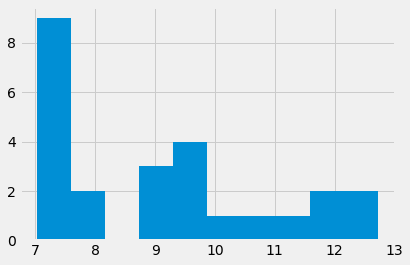

In [142]:
plt.hist(df['5d'])

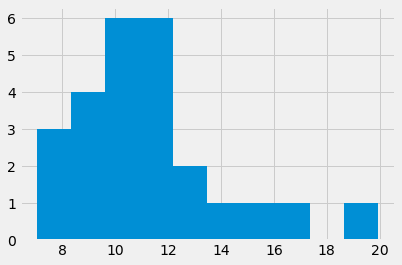

In [140]:
df['15d'].hist()

Построим гистограмму ещё раз, указав в качестве аргумента `bins` число $5$, чтобы получить более детальную картину:

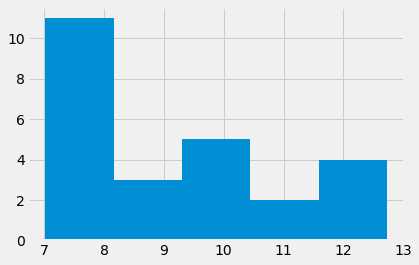

In [144]:
df['5d'].hist(bins=5)

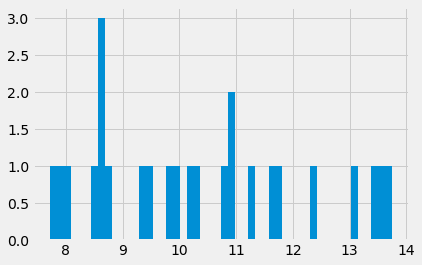

In [145]:
df['20d'].hist(bins=50)

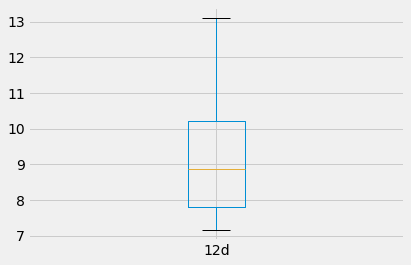

In [151]:
df[['12d']].boxplot()

Всё, что выходит за границы этого отрезка, считается выбросами (отмечены кружками). 

In [153]:
q1 = df['6d'].quantile(0.65)
q3 = df['17d'].quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(4.644999999999999, 14.781000000000002)

In [163]:
outliers = df.loc[(df['14d'] < boxplot_range[0]) | (df['15d'] > boxplot_range[1])]

outliers.shape[0]

3

In [164]:
outliers

,DATA,DBC,1d,2d,3d,4d,5d,6d,7d,110d,11d,12d,13d,14d,15d,16d,17d,18d,19d,20d
11,12.2014,5.68,5.92,11.76,11.51,13.71,12.73,12.29,12.74,11.98,8.06,11.74,13.96,18.84,19.95,15.67,14.44,12.81,17.12,13.46
12,01.2015,4.88,5.51,13.68,12.88,13.81,12.23,12.33,12.85,13.23,9.97,13.11,14.66,16.72,17.18,16.04,14.83,13.56,13.72,13.57
13,02.2015,3.91,4.86,13.09,11.52,12.57,11.46,11.22,11.79,11.54,9.79,11.46,13.23,14.91,15.45,13.38,13.36,13.78,13.67,13.74


Доля выбросов:

In [165]:
outliers.shape[0] / df.shape[0]

0.12

In [156]:
df[['1d', '20d']].corr()

,1d,20d
1d,1.000000,0.911435
20d,0.911435,1.000000
